In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import random as rd
from sklearn.decomposition import pca
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
from sklearn.preprocessing import Imputer
from missingpy import KNNImputer
import csv
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sklearnPCA
Mt=pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/Mt1t.mutate.csv")
#Mt.head()


In [46]:
mt=Mt.drop([0,1,2]) #deleting first 3 rows
mt.head()


,Group,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X2702,X2703,X2704,X2705,X2706,X2707,X2708,X2709,X2710,X2711
3,H,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,T,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
5,H,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
6,X,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
7,J,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [47]:
#removing the columns group in order to get a dataframe of predictors
pred=mt.drop(mt.columns[0],axis = 1) 
pred.head() #group has been dropped
pred.shape

(1074, 2711)

In [48]:
#Checking number of missing values

pred.isna().sum().sum()

601

In [49]:
#Uses KNN as imputation method
imputer = KNNImputer(n_neighbors=1)
pred_imputed = imputer.fit_transform(pred)
pred_imputed = pd.DataFrame(pred_imputed) #transforms X_imputed from array to pandas dataframe
pred_imputed.columns = pred.columns  #sets column index appropriately

In [50]:
#renaming the dataset with the imputed 
pred = pred_imputed 

In [51]:
#Dropping unnecessary columns
pred = pred.drop([0,1,2])
pred.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X2702,X2703,X2704,X2705,X2706,X2707,X2708,X2709,X2710,X2711
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
#Using apriori with a minimum support of 0.25

from mlxtend.frequent_patterns import apriori
apriori(pred, min_support=0.25, use_colnames=True)

,support,itemsets
0,0.269841,(X33)
1,0.404295,(X1278)
2,0.408030,(X1447)
3,0.481793,(X1586)
4,0.408030,(X1647)
5,0.464052,(X1919)
6,0.345472,(X2384)
7,0.467787,(X2605)
8,0.403361,"(X1278, X1447)"
9,0.399627,"(X1278, X1586)"


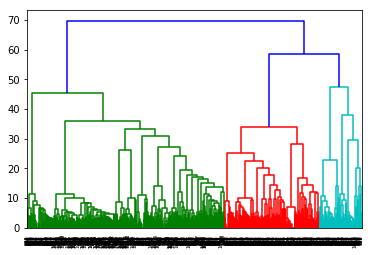

In [53]:
#Plot linkages using ward, complete and cosine

from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(pred, 'ward')
dn = dendrogram(Z)

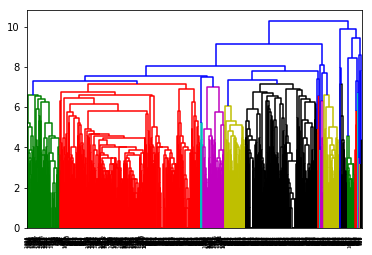

In [54]:
Z = linkage(pred, 'complete')
dn = dendrogram(Z)

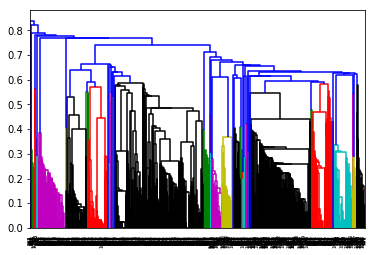

In [55]:
Z = linkage(pred, 'single',metric="cosine")
dn = dendrogram(Z)


In [56]:
#Splitting the data
y_pred = Mt[u'Group']
y_pred = y_pred.drop([0,1,2])
x_mt = Mt.drop(u'Group', axis=1)

In [57]:
scaler = StandardScaler()
scaler.fit(pred)
X_scaled = scaler.transform(x_mt)

/Users/capio/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


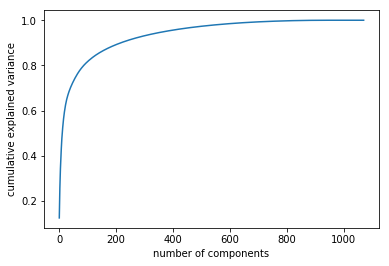

In [59]:
from sklearn.decomposition import PCA

pca = PCA().fit(pred)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');   #First 200 components explains about 90% of variation


In [60]:
pca = PCA(n_components=200)
pca.fit(pred)
pred_200PCA = pca.transform(pred)


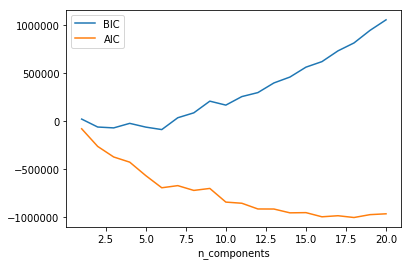

In [61]:
# Optimal Number of Cluster

from sklearn import mixture
n_components = np.arange(1, 21)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(pred_200PCA)
          for n in n_components]

plt.plot(n_components, [m.bic(pred_200PCA) for m in models], label='BIC')
plt.plot(n_components, [m.aic(pred_200PCA) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');


#Lowest number of components for AIC is about 18
#Lowest number of components for BIC is about 3

In [62]:
#Number of Clusters using Elbow Method

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(pred)
    kmeanModel.fit(pred)
    distortions.append(sum(np.min(cdist(pred, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / pred.shape[0])

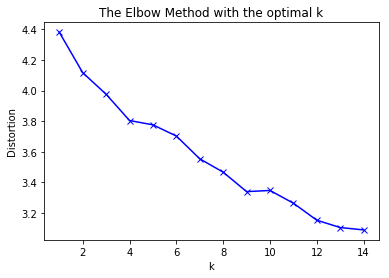

In [63]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method with the optimal k')
plt.show()  # Optimal value for k is around 10

In [64]:
#CLUSTERING

/Users/capio/anaconda2/lib/python2.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


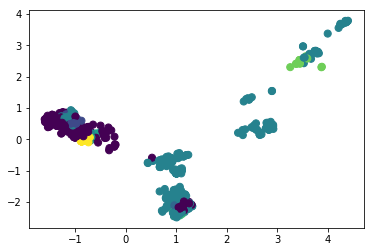

In [65]:
#Spectral Clustering

from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=10, affinity='nearest_neighbors',
                         assign_labels='kmeans')
labels = model.fit_predict(pred_200PCA)
plt.scatter(pred_200PCA[:, 0], pred_200PCA[:, 1], c=labels,
            s=50, cmap='viridis');


In [66]:
#Gaussian Mixture Clustering

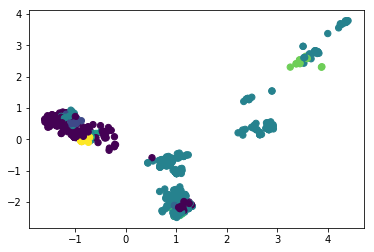

In [67]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=5).fit(pred_200PCA)
labels1 = gmm.predict(pred_200PCA)
plt.scatter(pred_200PCA[:, 0], pred_200PCA[:, 1], c=labels, s=40, cmap='viridis');


In [68]:
#Agglomerative Clustering

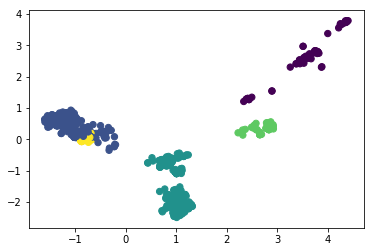

In [69]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=5).fit(pred_200PCA)
labels = clustering.labels_
plt.scatter(pred_200PCA[:, 0], pred_200PCA[:, 1], c=labels, s=40, cmap='viridis')

In [70]:
# DBSCAN


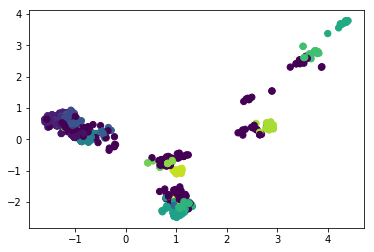

In [71]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10,metric='cosine').fit(pred_200PCA)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
plt.scatter(pred_200PCA[:, 0], pred_200PCA[:, 1], c=labels, s=40, cmap='viridis')

In [72]:
# Clusters to haplogroups

In [73]:
labels = pd.DataFrame(labels1)
labels.columns = ['groupnum']

In [74]:
y_pred = pd.DataFrame(y_pred)

In [75]:
bytypes = pd.merge(y_pred, labels, left_index=True, right_index=True)
bytypes.head()

,Group,groupnum
3,H,1
4,T,2
5,H,1
6,X,2
7,J,2


In [76]:
haplo = bytypes.Group.unique()
clusts = bytypes.groupnum.unique()

In [77]:
first = []
second = []
third = []

for x in haplo :
    x=x
    for j in clusts :
        j=j
        a = bytypes[bytypes["groupnum"]== j]
        b = a[a['Group'] == x].count()['Group']
        
        first.append({x})
        second.append({j})
        third.append({b})

In [78]:
first = pd.DataFrame(first)
first.columns = ['Haplotype']
second = pd.DataFrame(second)
second.columns = ['Cluster']
third = pd.DataFrame(third)
third.columns = ['Count']

df2 = pd.merge(first, second, left_index=True, right_index=True)
df2 = pd.merge(df2, third, left_index=True, right_index=True)
df2 = df2.sort_values(by = 'Count', ascending= False)

In [79]:
#Displays haplotype, their counts in respective clusters

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df2)


,Haplotype,Cluster,Count
1,H,2,157
21,U,2,71
91,A,2,59
56,B,2,57
126,L2,2,49
72,D,3,45
71,D,2,42
111,L3e,2,36
131,L3,2,33
6,T,2,32


In [80]:
# The table shows the Gaussian Clustering with their associated counts
